##10 Monkeys Species Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/10-monkey-species.zip"

In [3]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
batch_size = 64
img_height = 124
img_width = 124

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/training/training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1097 files belonging to 10 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/validation/validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 272 files belonging to 10 classes.


In [8]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


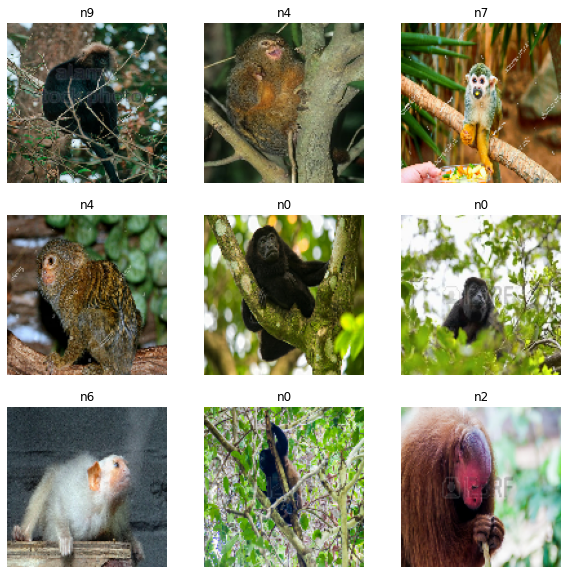

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [12]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [14]:
checkpoint = ModelCheckpoint("model_monkeys.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose = 1)

earlystop = EarlyStopping(monitor="val_loss",
                         min_delta=0,
                         patience=3,
                         verbose=1,
                         restore_best_weights=True)

callbacks = [earlystop, checkpoint]

In [15]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callbacks,
)

Epoch 1/50
18/18 [==============================] - 43s 1s/step - loss: 2.2938 - accuracy: 0.1343 - val_loss: 2.0928 - val_accuracy: 0.2243

Epoch 00001: val_loss improved from inf to 2.09284, saving model to model_monkeys.h5
Epoch 2/50
18/18 [==============================] - 22s 1s/step - loss: 2.0001 - accuracy: 0.2770 - val_loss: 1.6397 - val_accuracy: 0.4301

Epoch 00002: val_loss improved from 2.09284 to 1.63975, saving model to model_monkeys.h5
Epoch 3/50
18/18 [==============================] - 22s 1s/step - loss: 1.5998 - accuracy: 0.4007 - val_loss: 1.4484 - val_accuracy: 0.4853

Epoch 00003: val_loss improved from 1.63975 to 1.44836, saving model to model_monkeys.h5
Epoch 4/50
18/18 [==============================] - 22s 1s/step - loss: 1.2555 - accuracy: 0.5657 - val_loss: 1.4532 - val_accuracy: 0.4890

Epoch 00004: val_loss did not improve from 1.44836
Epoch 5/50
18/18 [==============================] - 22s 1s/step - loss: 1.2167 - accuracy: 0.5828 - val_loss: 1.3081 - val

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

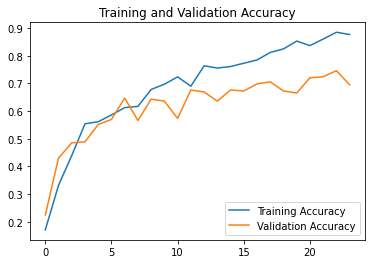

In [17]:
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

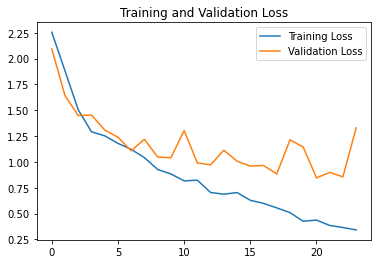

In [18]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

65536/64424 [==============================] - 0s 0us/step
This image most likely belongs to n2 with a 100.00 percent confidence.


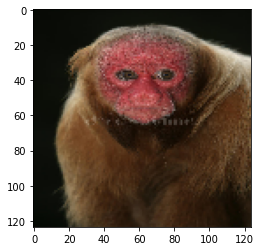

In [19]:
image_url = "https://thumbs.dreamstime.com/b/uakari-monkey-cacajao-calvus-single-mammal-tree-brazil-35039125.jpg"
image_name = image_url.split("/")[-1]
image_path = tf.keras.utils.get_file(image_name, origin=image_url)

img = keras.preprocessing.image.load_img(
    image_path, target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [20]:
# Accuracte Prediction n0=cacajao_calvus

188416/180460 [===============================] - 0s 0us/step
This image most likely belongs to n4 with a 67.22 percent confidence.


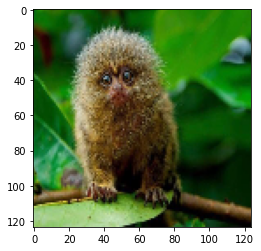

In [21]:
image_url = "https://i.pinimg.com/originals/e2/50/20/e25020f0b8e015a50445e1c83b3f23a8.jpg"
image_name = image_url.split("/")[-1]
image_path = tf.keras.utils.get_file(image_name, origin=image_url)

img = keras.preprocessing.image.load_img(
    image_path, target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [22]:
# Accurate Predicti0n n4=cebuella_pygmea

3973120/3968706 [==============================] - 0s 0us/step
This image most likely belongs to n7 with a 86.47 percent confidence.


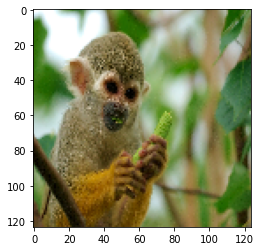

In [23]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/2/20/Saimiri_sciureus-1_Luc_Viatour.jpg"
image_name = image_url.split("/")[-1]
image_path = tf.keras.utils.get_file(image_name, origin=image_url)

img = keras.preprocessing.image.load_img(
    image_path, target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [24]:
#Accurate n7=saimiri_sciureus

8192/6840 [===================================] - 0s 0us/step
This image most likely belongs to n8 with a 37.18 percent confidence.

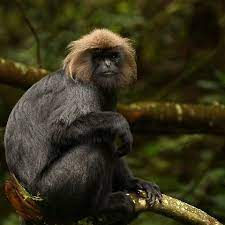

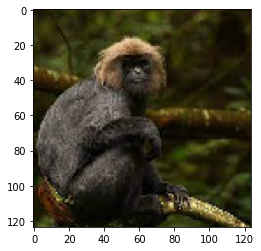

In [26]:
image_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUWFRgWFRYYGRgaHBgYGhoYGBgaGBkaGhgZGhgZGRgcIS4lHB4rHxgYJjgmKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QHhISHjQhISE0NDQ0NDQ0MTQ0NDQ0NDQ0NDQ0NDQ0NDQ0MTQxNDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDo0P//AABEIAOEA4QMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAACBQEGB//EADkQAAEDAgQDBgUDBAICAwAAAAEAAhEDIQQSMUEFUWEicYGRobEGEzLB8BTR4UJScvFisjSCFSMz/8QAGAEAAwEBAAAAAAAAAAAAAAAAAAECAwT/xAAiEQEBAAICAgIDAQEAAAAAAAAAAQIREiEDMRNBMlFhgSL/2gAMAwEAAhEDEQA/APlj2EKzWpmuySisoLm5TSizXE2KgcQUSqzdEosGqW4KtRqrmIqSu1ICGbhTx+xsuH3VsslCc26bpMNleV0BqeHsqFpBgLRoRlQHskrCZ9i0Si6Fc4qLIJfAS5OY9E52cvRx2JQauIKsxgiFSrROyJIW1aAzHVaJwbcqzaDHNOi1mYi0ELLOZb6GyBZdStUiyPlBN0rjoiy0wPGkqj5KrnhDCu1hcttaC1MFxWrh8DAndJ4emGmU3W4llENCjLK3qK2pXpRaUtUEDVBfiiTcrrqwhGONntOyVeq6YQ2u5rtV90Fz1vIDLSCuuZZLU3psCQlehAVEx8kqI3DOuF0dmiFWZCEKywsJzFBCw7zOU+CO4SqVGWkai/eqx6mglakUKIsmWYjM0WuhPaZVbLSjGSU5TcAl2lBJdNlN7I47ERojYRxKzmMdNwncM9FwmgNiqHVBZAsiuJIN0xw3g76z4aCZ36bxzNjboo/itbBZUEwEe0LbHwFiARJaAd50uPsSfBUxXwxXpXIzDptpr5pdSFcLGawtGqIACl67ALn3SLMcQSBoljeSdNZ1MAyEGuGkbLPrYskJJlR07rSSqkgr8Ndda4Cy46tzQHGbp904O+outEhLNHNdc+CqmItXrUgk3uTeeUjXVT3ogCVwqAKFah1gWphGiJKy5TGHqkKMpuCNXOokvmFRZ8TN1HzukXvgoolBfSKeMA1OrKeo0S5JYalC16L4Fksv4CRohj4OhR3loCmPZYE6ylKxSl2n2jnZjYI9MADqq0g3xQ8RUjRGhsyxyJQp5jDRJOyNwLCNd26rg1gNgZlx5Abr6PwkU2N7FNg6/La1xGnaGvmVOV0rHDkxOC/BmcZquZv/ABIibL1mGwlLDMhg6CTJ7sylfG21F45el4PmsPG8QfcjNAMT2S2dwbi/cs+3TjjjGnieLaEHlYXIPK28K+G4u10gwRymdR+XXgsdxRwOrREnsnUmSTbw32S+E48J7boAjQxcQNkcaq2PdcV+HqNdpcwAG5MbnXXay+cY/wCE8SxxAbLRvmAB6CTJ15L2OE+KKYIBcXG/0iYjnsCn3Y1lcEBxHK4B31Piqx3j2zyxxr5kzCPZZ4II2Ig+RQK1QTYLd4wz5RgZrzMkOG40mNOpXnH1AXK5bWFmqI9q4iNbKFWRKBKTAVzE047kClVhEqVyVYijXwla10V7kNyeM72NAqpCs4KALQtBkItELjmotNsBK3ox/lqLnzFFHYO06aa/TgrRxOAp5GPa651byS7KZJhpk8ljM5RcavhsBPJMjChtwLoZzsHaa4K1GuXJXdT2z+JnTvVMTTESmOKsEW5pV5JATx6gs6AY0i6E5smU407J3AYMPIbpPj6KtlB/hvCPe+WSGtgOfyt9LTaDA2Ijde4fiGUWWAcd+RPQ6+2/RJYZjWFmHoiwu8x3kuJ3mNByCy/iHFS4sboDHl91F7rqwx1Gfxn4iqvlrDkBsS2xI2GbWF5LGVHaOJPK/wC622Mk/TPXbzKyeNUe0OXRb4YxnnazX1RENEeJ3j9lxhA1v4pyhwwvMNjp3rXrfC8UW1A5twLTvIaW99x5rXpn2zMFxHtAZfWO9emwGNFMjSDG6842i1s5x2gAACSbaRbYeHinGOJA6KM5NKxyu3oeJ12vYZgtgwT9QIGmsOPUi2sLw9IXuvRMeXMc0akc9SBYLzrH9onmZWWPqxWXtpsFpSmI1VvnWQ3PUzGyoqBoXTCsGyhvpu5rSQBkITzdH+UhZLqj30JTZKv8oKrJV88KbaW0dTAuUAlde+VUFOBfKouZlEza5xMjVWoYmCHA3BlYzcQrsrrK+Npyj3OG4w2q4NeBpHik64Y1/fsNQvNUcWWmQbov6ouJc4ySs747C1NvRYrCjJmaRB57d6SxHC6raYfZw5g38kizGEAtWtg8PVc0ZnFrImNyOcbDqiY5eoLMdMalUIMEGVr8OeGuBeYEgkC5gazyTdLCQA51pkgbkT2ZPVSvgmyMtpOvQ67d3kujHx/tl6em4HXzFzzq9r3DaDq0eA91jPY1zyPYa/sOqLSxQpOp5jAaXNMagOEEnmIJWLgKhYahfIh2WdogwRzBEGeR6qLhd1vM5rTRxLWCzQLanWPz8C8vxUzfy6krc+YCNzMRHITbv1Xn+Ivl8cp6XOuuyvDqpz7hnhDGsIJuSZP8J6viGB/ZfDHGTTklsi09/wBPi0Lz5Y515803Q+YGkANA0s1vvE7rWshOJ02POduvMaFMcOoW1WZ8sB1z9h5BaeEGXTTccjz7lGfpeI76WR1jE8416WmJXlcQYe7o53uV6HF4q4DtNZnfXw5Lztdsvd/keu/NRhDyu1mPR2QlWsRMyqo2ZzgLoqhIueuB5RoSm6lZDY0qjRFyo+pyRYVXqvA0Qc8ri7HREmg60zZXNMjVDYYKfY8OCMrqFvRZRNfICiz5wuRD9KdihOY4apoPVgtOV+1k2vIR6DnOcGtBc5xgAXJPRHbSzENAkkwANSV6/hPC2YZhNjUcO07do/tb535+Cc1kW6DwvgzGGXw94En+xpnQf3Hrotqq7sk2BcQLmLb+On4UhXxIaANLzA32PogVMQ94GUOMHbQnbwGvgqkkG2jicSNR0EaCwMeYVKTxJJiJ8ItMD7rNio2XPMyBAHmb926u2m54E9lthDdTYRCZmMawVDmGhvYXm9vZKswb3MyO+nYkaTEX2EAxHNa+FpiMukREDSIjTT6UZzhfQRFtol2Yaco8+qA8s7BvZIgxMiZsP9BZ2LoSObpE7G4kei9xiaQOawkHLBuDLWgT/H7rz3FMO2Lcm6d19e4o0W680ytBANv4+6ZZitp29bpDGMuT+eKWZU16oG2u2sDBPUI/z9CPQ+6ycMZT2dous8qcyUr1C48r/wClBTCoHCZVXvKnY5B1OiAXFGAV2UpVb0RcMJRWtAR3AALgpEpctmWqGVVrCmnU1SE5ehIvhoButSm1jhssYtXGNdsilY1sRhWbQkYDSuMY/quvpHcJdek6G/Vd3mok/wBOolxxGo66xXQ5Betr4Z4eKjy947FPKTP9Tiey39/Dmq1tUrZ+HuFhjTVeO1FgR9LTvH9xHoRzT+JD97bxuJvBI/PuyahDDJF3ydIAlsAHwCpW1ImbG/PNOvPQK5NGzGUc7hm0n8KbfTDWQJGsbEz18AhCAQBcG5Pdf0SxqzJJJudNvyAmFqj5IaNANuZi3cNU2ypAjU/lreCRoybtGY7D0knyT+HoBl3uzONoEkDoP7v9IB3Cg5dROo1tO1jcAH1Vg9sloBOx1vMkn+ep5hdcIAFmztsBz5/g6JfE4gNe0NGkk84dYDqTr3SgL4h93A9COZO5jqOXJY2PqZoEX6xo3Yd0Qtx9EEOcYIJB1ByWk9ddv+Kx8eAHuvvYHQgggQNN/NAeSxtnbcvaPdZxF1s8WomAQD3693dssttF39rvIoSNhWkm3JOZBF0PCvyX52WhTrsP1BYeTKy+lY47hFlEn6QSitwTzeFuYLiDGNgNBXamMZAyiDuNljc8t9RcwY7eGu5Lr8I9v9K0jxOG2gGUPF8QL4JgdyXLIWSMgYVxNhJR203CZbom2VspBBuo7EHNJveVXKjjGZVadwUBwPJe54xTY+iysxoBFj1WGXtedACnj5P4Jiw6Wt1pUCxuqI+mGmIEhVe1piQnc90rjTtCm15hsJXH0yx2Vwgq1N4b9Njz5I36jtS/tW3Ucuy4dM2yiczN/sHmuJ808K84XL3+BwnycMxpEdpj39SQHO8BMf8AqvGcHwRqV6bCOyXNzSLZRdw8QCF73FVwSQb7a73AIC64JFsS9uc3HIjyhLU3yY5bRyBLdeh/IBQ8QT2ev+r+N1xjyLgSRc2vaPP+CmEqm3gYPWR5JBzolo1M/nqFqYhgcQRYW1238tAlThwDvqJn7XQYuHZkaBbMRoOc28EfCuaCXve2bBkxGYgnny9xzWfiKzpLWGBBk7k7ARpusvGvqZswixyxeLAN05AWnXVAere/NHITIP1ZtWze4u7xasnieKY021dJP93I9LyRtYdUm/jDmgNmX5XR/k8jMZ7gT/7LHdSc5xL7zud72A5G4sjRHa/GapD26ZtdPzSL9OiTzO+owSdzr4fsrtwpbuXDv2uJ81ymS20W/NvzZAWFd5uCe6VcVnn+q3WUO5BE5Qdp711rWjeOnXqgHG0y4bEamQPIHuS2OwpZ2m3baeh/ZaeCawgEm0ff9iQi13tLSyARofbwSyxlOZaYNPFRdDxPECdEjiA5rizkSPDZBcFE8U3urvlutQ2MUUUYm2qzw1XcncIjlWlUrAEQqvxUrMLirGUvjh8noTjX/JjN2eSz6eKLTKzjVMRKgqJTxyDk2KuPzGSqvxQssnMp8wo+ODk1mVpm6hxKTdWblEa7oYfKXxw+VaH6lRIQojhByr03w8CaznGIax21pcIC0A4l+V22v2nxIWVwV5ayq4awyOepB9wtGlX+oHV0zHP76ALTGdIMVaZIBi3roSR6R4oTAWQ7aSD3GZ9wifqrtEACZ850H5oi1GSASDlP1D0P7+Ko1f8AiNgANwRy+0oVYTfeQIOvVp35e6LWbAgG82nfSAfC34Unia1uRsB53HS0IIpisVByjc+2p5myROKMG/juSSIHgAPElBxOIIeC43Ag+J1Hl6JSrWmBPN3jP7IGzTSJc4+flomqGKAHaAy7rENVwkT/AKv/ACqtxBiDp/r9gnottnEY1urTbXx320uVl4nEkmd/9IeX2/AulgBvyKYL5zOqu2qZBPNR5bAI1t/K5IOiCO0MUSZkwFo0ca1xyxM2PlA+yyqVKG33XMO/ITsOamXd0Y3FsOQ/MNHCfHdZxaVrY3EBzG85/dIzKVuj0AJXQSjikSmcPhjKVzkJn5XclZoPJelp4EEaIb+EbrP5obDawnQKzsE/+wr0GHw7Gaq+JxrdG7clPy3fUDz7eHVInJZBqYV41C138SI3SzsTmMqpnl+hpmmmRsuT0Wk5wKo5gVcv2ZT5iiJZRPYO8HxBl7ebZ8iCtXB3JJ6Hqdz6LD4P9cc2uHpP2W606Ra8HppE+J9VcJerW7eYaDLG/f8AdP8A6g5TEf022vPLosNt35Z+oX75uFpU2xAI01k6i9/VAOPJsNdNdDyPqQk8SyTHge/r4gfhTVE5iBy+0gD1QseTDjy00jT7z6IN5fiABM/lrrNqyI63T2IcPqNve1ih4PCuqOgC02noFSC1Ci55gStzA8GkSfzw8CFr4PhrGDtAEj/RPcJ9UdxImOQBPdp33StPTIrYVrRoPArMr0JJhbjyXTfb21nr/Cj6TGtn8G/54o2djy9aiQgNsVs4xgcTH5GqyXtSI78zsaSZt+6SMzJ8lbKTp4J6jwwkZnOk8h9yi6nYLlstb0n3V6NFMOwrhsrNdAussst+jMUKATLA1qUo1+S7VY4hc9mVvaON2c/WBu8rv/yk2WI8EIRcVp8eK9NXFYkROpWe+sSIQnOKqCrmMgiOlXp0XLrCtPDubCq3QrOcwjVUqvgWTmOqDZZbijHsbVzqKQor6BihVyPDhsfTQ+i12YqJ5n+L/dY9KlmKe/TOyFwvlHa5gAxMeR80SwTtpMZv6xrBPkZ9FpVGkw4ax3CbT4pDhT2vABO8a6LTnsOkHMItrYg/680wmEtB0gg6WOUEk+yyuMYwNYAfqIA/mO9HxVfIAeYgRtc5pHcV5x7XVXFx0mAOWn54oFouGwpqvnbQDbkF6bBYJlO5iwg+PJC4fhQxs7yJjlsdU/UfTDdL7Rcd1+9GwI82vpfWQYyi3WJ9EJ7MwkWBJA2gzE322hJipDhBOU3OkdQOX+lf9U2DMxcxNhsDa5E/dIy1eQ0luwMkdb6/miSr1/6QdrhOV3y10SR2QTbWB9g2Vj1Haz1PunCqrn9rmD+38pOoJJVy/YbFceL+KCUiFp4CobhZJfcpqhUMghOzoHKmMOhCBVrAp6s1pAda+qCxjVz2aoL0QRdaWGqg6pV8bIRcQoy7U0sRTZGyy3sE2VX1iVymeaeOOvdCVAgAIteoEFj1rJ0Oh6bJKadTAFktTKMAXGJsouyJVnSVxo6Lbp8PGpRX0WAI5ydJuTBhdWjDFE+RcgMFSl0esE+gunmVCx14IuHC8ZSIc0g7EJDBVe0Sf7THejCo5xzC0azuN7pX26MMJMdrmg6i8hkllnNPQgx3n7haOExoewzFtT0sfcDxRuHgPZkfIIOkTlIIzQNIgfexgjGxTTTc9hiQZBEw8bOEicptYq8M99X3EZTjRMc4vcBsLDoNyTum+G4drQJjQmepcJWR805pF+frH3TzK0NBn1iAtEtao7JOYa2MaEAWPiIWfVrm51v3cjPlaEpW4i5zbknXXw+zQk6uJ2Hd/KBs+7FR2QddT7Ib6vOYvHPWfcys4Pv+bKzn6dw/PdPRbadavFPWDfnNyD7W/LZL6seUeS7XqWSjnSkDDDqV3Np4rlOzTO9guMN1QKF10xQff88EuASYF+5Gp0nXgG22h9UEdZjS0ZcoI5HROUC1wlwyHp+xWK6seXitnB4Os+g57WfMayLte0vYZtmZ9UGDt42U5Yy+zhmlSnQtPofVVrUgNd7hdwYL2TlylpI6gjUFGeXkQQHMP02GZp8PwwssvFPqixn5AqlgUFUIfzO9Z6pFq1MzopQokmFpUYOoRnuY0WVzL6EpI0oMJ+nSyN6quGol3aQcY8tCnW6c7Hbi4sla2IkpBjyVZ7ZVcZKVN9nmokflHmVE9T9l0JTMGTpvaYCfpslpgSR68/BZpKbwNWLT3Kc51uOjxZTeq0uG417bCZGXM0XL2g2Im2YD2C2ePUqBgZzLQHZXNcMhtLCWyQ65kRbvheZqPyuDxYq7qgf2mmHf1NOjuvQrPjuzKdLzxl6aOE4K5gc/MHdmACxzmnOBlINIulpEgzl13CxsTQex2V4ykbEET3c0Cu4zLZabEgWuN7b3KVdVJJJJnmbrox37c+XXSznqrXquaVyVaRQ+FwO6ocrmZAWeVVglVJVqRVAw86Dki0+yJiUuDJlHfeAg1jXdtYdAB7J3heKhwL2NeBfK/NlcNwcpB9VnwBYlMYeo0TBvyOikNZ+Fp1AXMY1pJPYaHQ0ajKSSSNRck2Q+HYOvTio1hc1hgSQQMpktDXWcO3Jb/wAiucO4g+i85YLajXU3NMwQ8dIIIMOBG7fBe6+F+Otw4LKgGScwsMwc6M0uiS22i588rjue5WuPbyVSoR+oqZSwvaAPpac4mW5Abag2tAKM7BVWOJbBYwU/mAWH/wBhIs6IF2yJ3A5JfjeKYcY+oGtyVHkw4w3TKXOLb5ZBJA16pzBcTzNrZjLajSzLo0Ny5AQ2dYJiLixm0KplrGUtdtTBfC1CrTJHZfmcc7XS1wk5S9rjA1AOXLds6EpPH/ClakAWtbUBE9g9tv8Amw3B5RMre+DeLChSFN8lsZTnEtc0zOUyLwIjS3fOrh67YHbAgukgXvcGYPtsbiVzZeTKZVXGV8uxTgwlpaWuGocCHDvBuEr8iblfZeK4LD12sp4ihfJmlsAyJa0scDIB7Q211hq8TxP4OLYNB5bIzZKv0u/wqNGgBFnDn2itMfJjf5WVxv08iKxZZBrV89ijcZwtag7JWpuY43GYCHCAZa4S1wuNCdVlNlbTH7I5Sws6FOswAhZlF7gVq0MTa6Momp+jCiN80KKNJYACbpYVxEhHwuDzLWZSLBdGWWmnJkVmSLW6Ov6pQDmOk/ytnEPbkIjefYLAqViCR4Hke9VhNxrzlnYr3cxPXdJvTDMQR9xsRy7kKoS6XRYQOl9PYrTHpGVlCCoFfKuFqtGklcJVgESjhy5wbYTudEbkACu0p8YLKCSMxA/LJbEUiAJi+nNTMpfQDBOgXLotNzctwc2x28VR9zIT2FbndQEgqFwH8LjTKYMuxJt0Mpuj8yreYH55pTD4YuudFr4dxADW6LLPKf6e6TqYQzdxlV+RUA7Nx+bFapok6rjaZWUzv2NsxnEKjDBLhtqe+LrY4dx4tPakjlmiJ366DSO9Kvpg2InvSmJwbBdtj5hO8MvZzKx9D4V8V5IcTcCxAJzSRIcCbc7W1WjTqsq9oOLHCCBMtDZcbDVoJfo2AL23Xx9xc1aPD+OvpkwdRG/nbfZZ5eC6/wCWkzn2+n4nDta2HsDmF0uDsj2AS3KXAsjMGtNy2O1bcLynH/g9pDn4aQ4AudTkOY4c6Thdo1JDpAnUBcw3xbDQ1wls/S4yevaET/K3MJxSjUblD3gkt7OWYDRAh031daN91GFzwOzHJ82Y3KS14LSLEEQQeoOivA2K9ljcC2qTTqNa7YVLBzQScpDrEN7QkG0g6xfyXHOB1sM+HCWG7XAhwIOkuFp7rHZdGOWOf8rPLx3EO/NRI53dVFfFnp6LhOi08RoooubP2GVifpPePYrz2M+oqKLp8f4w0qfS3uXMH9Y8fZRRaQ1sP9bf8h7qP+o+KiiX2AQmm/UO5dUSoNYf6XePsFOJfQO9vs5RRZ4/kGUf2Uq6BRRbEEjYfUd4UUTobDfuncIuqLkz+zp1Dcoos0FHbpasoori/sjU3ST1FF0Y+iHo6jv+y9J8Pf8A6U/82/8AYqKLLy+muL0XDv8AyT/m73C1Pj3663+Dv+qii5p+TTL0+YKKKLqcr//Z"
image_name = image_url.split("/")[-1]
image_path = tf.keras.utils.get_file(image_name, origin=image_url)

img = keras.preprocessing.image.load_img(
    image_path, target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [27]:
#Accurate n8=trachypithecus_johnii